In [1]:
############################################################################################################################
#### We are currently working on a dataset related to female affairs, driven purely by our passion for statistics and ######
#### data analysis. We want to emphasize that there is no bias in our approach, and our work is not intended to invite #####
#### assumptions or judgements about the subject matter. Our goal is to explore the data objectively and rigorously. #######
############################################################################################################################


In [2]:
#####################################################################################################
######################### FEMALE AFFAIRS DATA SET  ##################################################
#####################################################################################################


In [3]:
#################################################################
############ Part I - Importing
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('Affairs.csv')                      #### getting the data

In [5]:
df.head(10)

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6366 non-null   int64  
 1   rate_marriage    6366 non-null   float64
 2   age              6366 non-null   float64
 3   yrs_married      6366 non-null   float64
 4   children         6366 non-null   float64
 5   religious        6366 non-null   float64
 6   educ             6366 non-null   float64
 7   occupation       6366 non-null   float64
 8   occupation_husb  6366 non-null   float64
 9   affairs          6366 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [7]:
#####################################################################
########################### Part II - Duplicates
#####################################################################


In [8]:
df[df.duplicated()]                  #### no duplicates

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs


In [9]:
####################################################################
############## Part III - Missing Values
####################################################################


In [10]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])


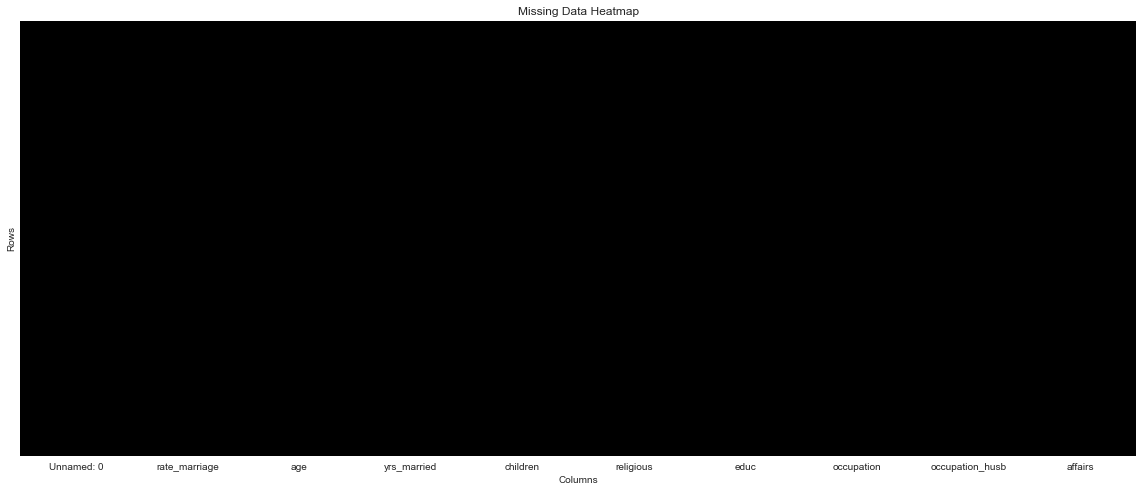

In [11]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [12]:
df.isnull().any()                         #### no null data

Unnamed: 0         False
rate_marriage      False
age                False
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
affairs            False
dtype: bool

In [13]:
####################################################################
############## Part IV - Feature Engineering
####################################################################


In [14]:
'''
rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                4 = good, 5 = very good
age             : Age
yrs_married     : No. years married. Interval approximations. See
                original paper for detailed explanation.
children        : No. children
religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly
educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree
occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree
occupation_husb : Husband's occupation. Same as occupation.
affairs         : measure of time spent in extramarital affairs

'''

"\nrate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,\n                4 = good, 5 = very good\nage             : Age\nyrs_married     : No. years married. Interval approximations. See\n                original paper for detailed explanation.\nchildren        : No. children\nreligious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,\n                4 = strongly\neduc            : Level of education, 9 = grade school, 12 = high\n                school, 14 = some college, 16 = college graduate,\n                17 = some graduate school, 20 = advanced degree\noccupation      : 1 = student, 2 = farming, agriculture; semi-skilled,\n                or unskilled worker; 3 = white-colloar; 4 = teacher\n                counselor social worker, nurse; artist, writers;\n                technician, skilled worker, 5 = managerial,\n                administrative, business, 6 = professional with\n                advanced degree\noccupation_husb : Husband's occupation. Sa

In [15]:
df.head()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [16]:
df.columns

Index(['Unnamed: 0', 'rate_marriage', 'age', 'yrs_married', 'children',
       'religious', 'educ', 'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [17]:
df.drop(columns='Unnamed: 0',inplace=True)               #### for obvious reasons

In [18]:
df.head()              #### now we will take on rate_marriage, 0 as poor,
                       #### 1 as good
                       #### 2 excellent

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [19]:
df.rate_marriage.value_counts()                  #### so here 1 and 2 as 0
                                                 #### 3 as 1
                                                 #### 4 and 5 as 2

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

In [20]:
df.rate_marriage = df.rate_marriage.apply(lambda x: 0 if x in [1, 2] else (1 if x == 3 else 2))


In [21]:
df.head()                        #### now it makes more sense

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,2,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [22]:
df.rate_marriage.value_counts()                  #### note: 0 - poor, 1 - good, 2 - excellent

2    4926
1     993
0     447
Name: rate_marriage, dtype: int64

In [23]:
df.yrs_married.value_counts()                   #### this doesn't make sense

2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64

In [24]:
df.yrs_married = df.yrs_married.round()

In [25]:
df.yrs_married.value_counts()                       #### we will make it easier to read
                                                    #### 0 as 0-5 years married
                                                    #### 1 as 5-10 years married
                                                    #### 2 as above 10 years married

2.0     2034
6.0     1141
16.0     818
23.0     811
9.0      602
13.0     590
0.0      370
Name: yrs_married, dtype: int64

In [26]:
df['years_married'] = df['yrs_married'].map({2:'0-5 years',
                                             6:'5-10 years',
                                             16:'above 10 years',
                                             23:'above 10 years',
                                             9:'5-10 years',
                                             13:'above 10 years',
                                             0:'0-5 years'})


In [27]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years


In [28]:
df.years_married.value_counts()

0-5 years         2404
above 10 years    2219
5-10 years        1743
Name: years_married, dtype: int64

In [29]:
df.children.value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [30]:
df.children = df.children.round()

In [31]:
df.children.value_counts()                       #### we will do into 3 cats, 0 kids = 0
                                                 #### 1-2 kids = 1
                                                 #### more then 2 kids = 2

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
6.0     203
Name: children, dtype: int64

In [32]:
df['kids'] = df.children.map({0:'zero',
                              2:'1-2 kids',
                              1:'1-2 kids',
                              3:'more then 2',
                              4:'more then 2',
                              6:'more then 2'})


In [33]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids


In [34]:
df.kids.value_counts()

1-2 kids       2640
zero           2414
more then 2    1312
Name: kids, dtype: int64

In [35]:
df.religious.value_counts()                     #### with this we will do, 1 - not religious
                                                #### 2-3 neutral
                                                #### 4 as religious

3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64

In [36]:
df['religion'] = df.religious.map({3:'Neutral',
                                   2:'Neutral',
                                   1:'Not Religious',
                                   4:'Religious'})


In [37]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious


In [38]:
df.educ.value_counts()

14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64

In [39]:
df['education'] = df.educ.map({14:'School',
                               12:'School',
                               16:'College',
                               17:'College',
                               20:'University',
                                9:'School'})


In [40]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School


In [41]:
df.education.value_counts()

School        4409
College       1627
University     330
Name: education, dtype: int64

In [42]:
df.occupation.value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [43]:
df['occupations'] = df.occupation.map({3:'white collar',
                                       4:'skilled worker',
                                       2:'unskilled worker',
                                       5:'professional job',
                                       6:'advanced job',
                                       1:'student'})


In [44]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar


In [45]:
df.occupations.value_counts()

white collar        2783
skilled worker      1834
unskilled worker     859
professional job     740
advanced job         109
student               41
Name: occupations, dtype: int64

In [46]:
df['husb_occupation'] = df.occupation_husb.map({3:'white collar',
                                       4:'skilled worker',
                                       2:'unskilled worker',
                                       5:'professional job',
                                       6:'advanced job',
                                       1:'student'})


In [47]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations,husb_occupation
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker,professional job
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar,skilled worker
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar,professional job
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job,professional job
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker


In [48]:

df['affair_binary'] = df['affairs'].round()


In [49]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations,husb_occupation,affair_binary
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker,professional job,0.0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar,skilled worker,3.0
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar,professional job,1.0
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job,professional job,1.0
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker,5.0


In [50]:
df.affair_binary.value_counts()

0.0     4788
1.0      781
2.0      287
3.0      188
5.0      166
8.0       51
7.0       36
11.0      17
4.0       12
17.0      12
18.0       8
24.0       4
27.0       3
16.0       3
6.0        3
9.0        2
26.0       2
58.0       1
38.0       1
39.0       1
Name: affair_binary, dtype: int64

In [51]:
df['target'] = df.affair_binary.apply(lambda x: 0 if x==0 else 1)

In [52]:
df.target.value_counts()

0    4788
1    1578
Name: target, dtype: int64

In [53]:
######################################################################
############## Part V - EDA
######################################################################


In [54]:
df.groupby('target').mean()

#### from this we can derive that people who had affairs were less happy in marriage, older, more years married, more kids, less religious, less educated compared to people who didnt have affairs

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary
target,,,,,,,,,,
0,1.795948,28.745614,8.218672,1.339808,2.490602,14.281328,3.407895,3.846074,0.023911,0.000000
1,1.423321,30.106147,10.387833,1.634347,2.230672,13.993029,3.473384,3.862484,2.773083,2.813688


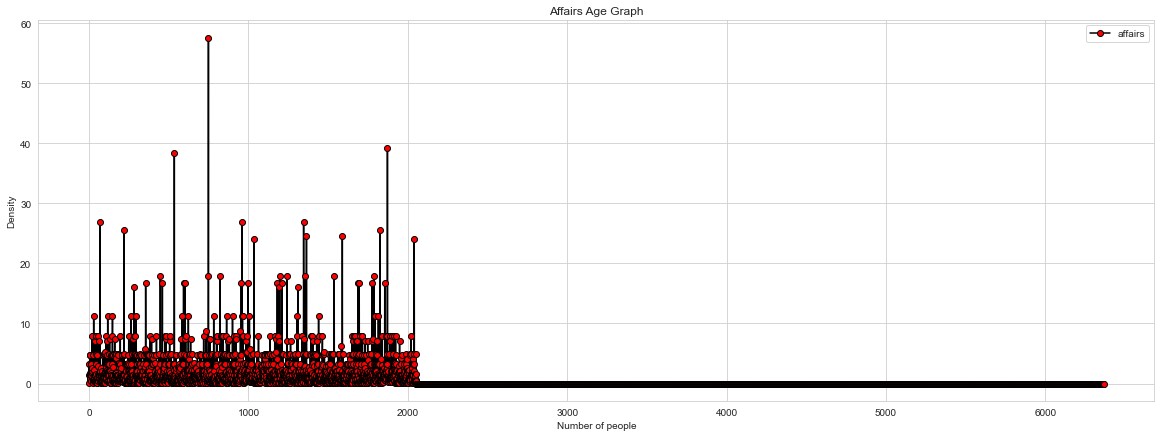

In [55]:
df['affairs'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Affairs Age Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')

#### seems like most of the people didn't have affairs

In [56]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations,husb_occupation,affair_binary,target
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker,professional job,0.0,0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar,skilled worker,3.0,1
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar,professional job,1.0,1
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job,professional job,1.0,1
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker,5.0,1


In [57]:
df.age.mean()

29.082862079798932

In [58]:
df.age.std()                  #### seems good

6.847881883668904

In [59]:
corr = df.corr()

corr

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,target
rate_marriage,1.000000,-0.109652,-0.124498,-0.120126,0.060606,0.063370,0.035648,0.022361,-0.168138,-0.168447,-0.272354
age,-0.109652,1.000000,0.893751,0.668239,0.136598,0.027960,0.106127,0.162567,-0.089964,-0.079380,0.085793
yrs_married,-0.124498,0.893751,1.000000,0.765033,0.131568,-0.107169,0.042653,0.129899,-0.087969,-0.077499,0.126677
children,-0.120126,0.668239,0.765033,1.000000,0.141547,-0.140250,-0.015040,0.085077,-0.069735,-0.063077,0.085878
religious,0.060606,0.136598,0.131568,0.141547,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.122610,-0.127784
educ,0.063370,0.027960,-0.107169,-0.140250,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.017451,-0.057159
occupation,0.035648,0.106127,0.042653,-0.015040,0.035746,0.382286,1.000000,0.201156,0.004469,0.006539,0.030008
occupation_husb,0.022361,0.162567,0.129899,0.085077,0.004061,0.183932,0.201156,1.000000,-0.015614,-0.014680,0.005263
affairs,-0.168138,-0.089964,-0.087969,-0.069735,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.997369,0.538781
affair_binary,-0.168447,-0.079380,-0.077499,-0.063077,-0.122610,-0.017451,0.006539,-0.014680,0.997369,1.000000,0.548590


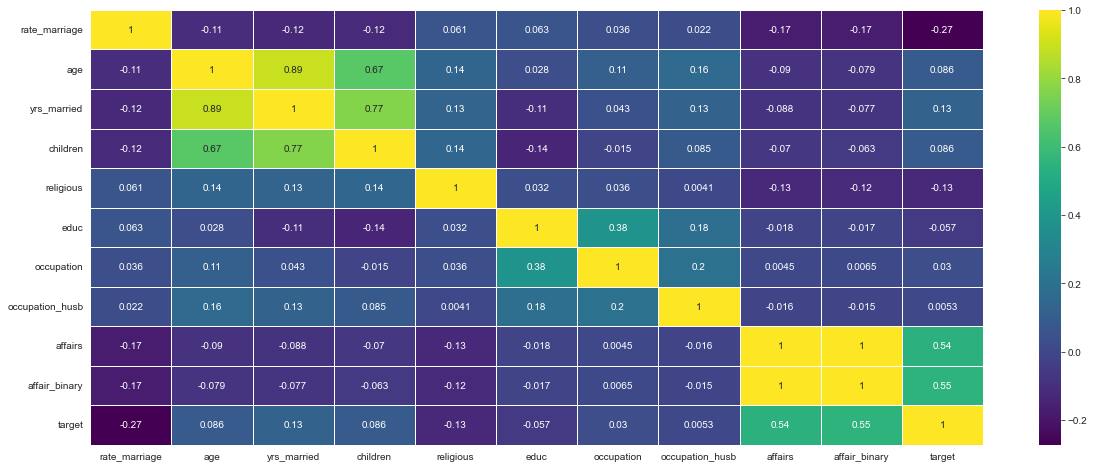

In [60]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')

#### we will took more deeper into occupation and more correlated cols

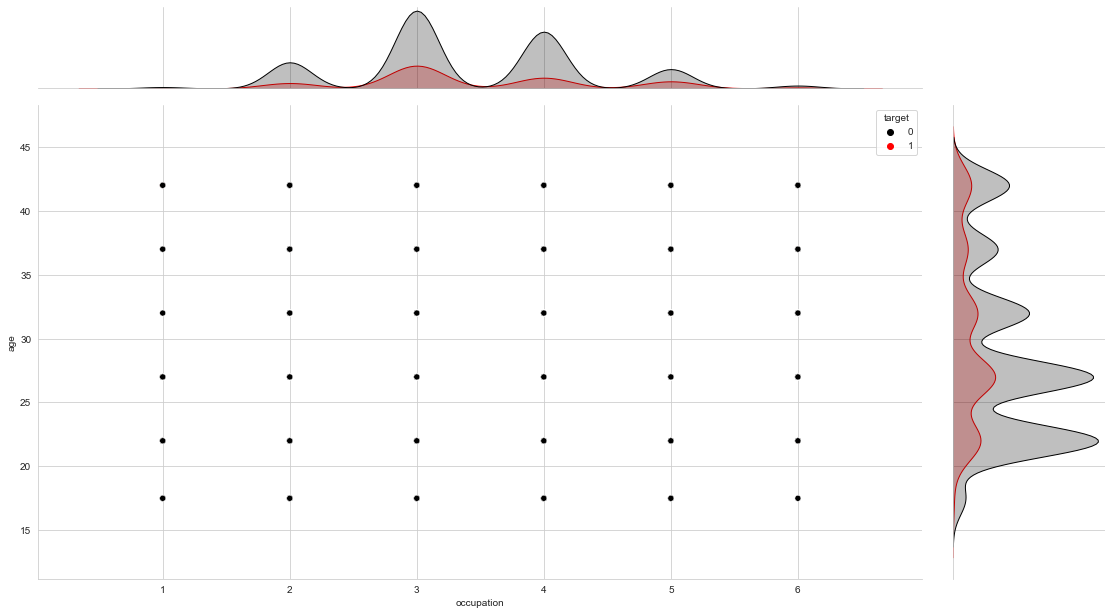

In [61]:
custom = {0:'black',
         1:'red'}

g = sns.jointplot(x=df.occupation,y=df.age,data=df,hue='target',palette=custom)

g.fig.set_size_inches(17,9)

#### seems like theres a peak in affairs in occupation 3 and age between 25-30


In [62]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations,husb_occupation,affair_binary,target
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker,professional job,0.0,0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar,skilled worker,3.0,1
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar,professional job,1.0,1
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job,professional job,1.0,1
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker,5.0,1


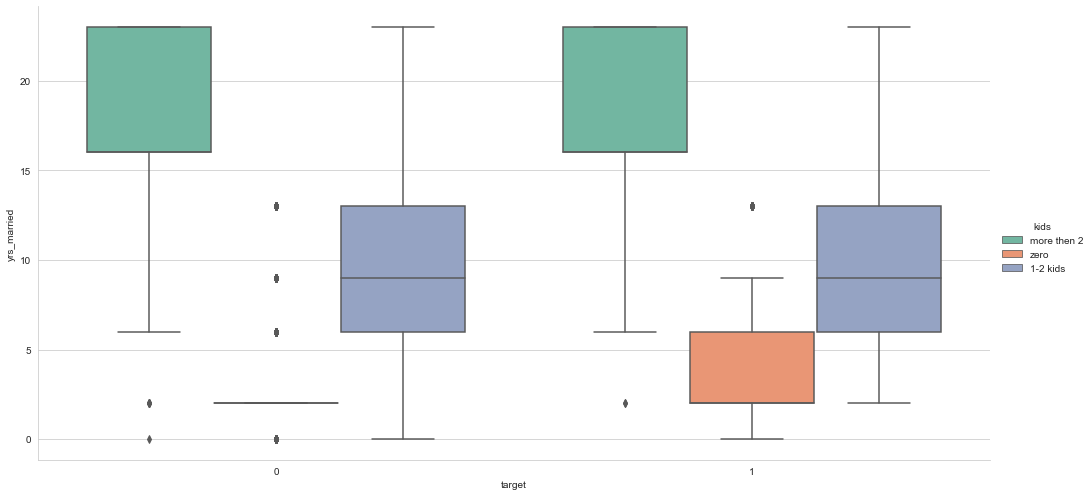

In [63]:
sns.catplot(x='target',y='yrs_married',data=df,kind='box',height=7,aspect=2,legend=True,hue='kids',palette='Set2')

#### this is quite revealing, people had affairs with zero kids while compared to who didn't have affairs, apart from this its pretty even on other cats

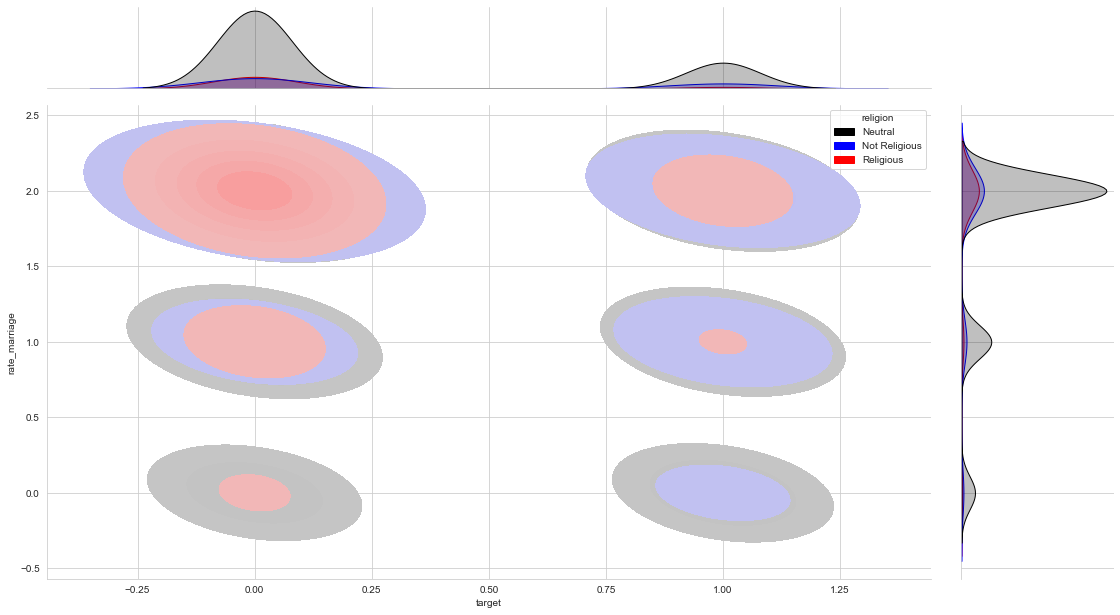

In [64]:
custom = {'Neutral':'black',
          'Not Religious':'blue',
          'Religious':'red'}

g = sns.jointplot(x='target',y='rate_marriage',data=df,hue='religion',kind='kde',fill=True,palette=custom)

g.fig.set_size_inches(17,9)

#### people who rated 0 for marriage and had affairs were not religious
#### but if you really see and absorb then you will realize people who had affairs were more on the neutral side of religion


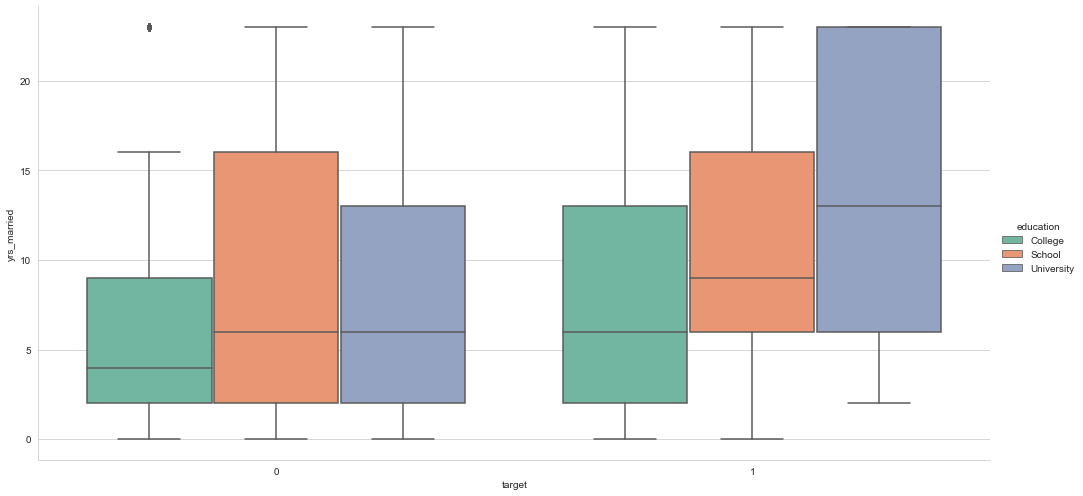

In [65]:
sns.catplot(x='target',y='yrs_married',data=df,kind='box',height=7,aspect=2,legend=True,hue='education',palette='Set2')

#### quite interesting that people who had affairs were majority from University level education but on the higher side on the years married scale

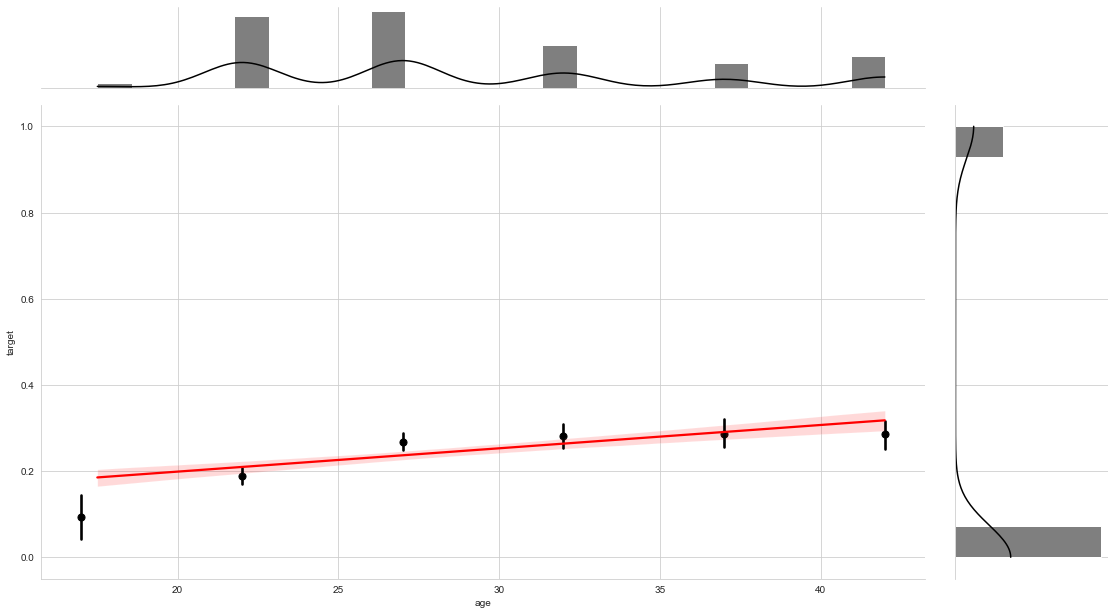

In [66]:
g = sns.jointplot(x='age',y='target',data=df,kind='reg',x_bins=[range(1,80)],color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)

#### clearly we see the linear correlation between them, more older meaning more likely to cheat from the data we have

In [67]:
from scipy.stats import pearsonr


In [68]:
co_eff, p_value = pearsonr(df.age,df.target)

co_eff

0.08579280438452551

In [69]:
p_value                          #### definately related

7.0583463220151935e-12

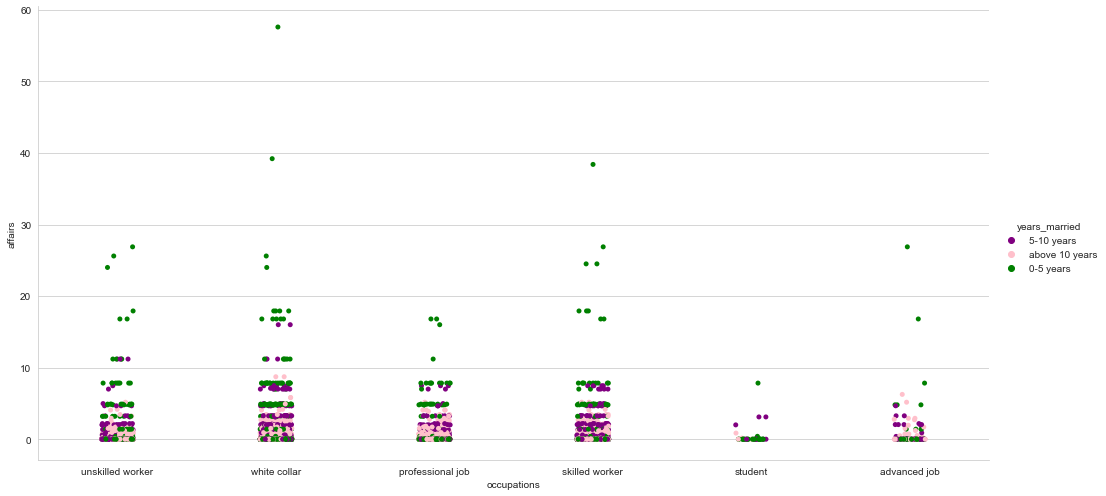

In [70]:
custom = {'5-10 years':'purple',
          'above 10 years':'pink',
          '0-5 years':'green'}

sns.catplot(x='occupations',y='affairs',data=df,kind='strip',height=7,aspect=2,legend=True,hue='years_married',jitter=True,palette=custom)

#### this gives us more better picture to people who had affairs and their occupations and years married, pretty revealing

In [71]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations,husb_occupation,affair_binary,target
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker,professional job,0.0,0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar,skilled worker,3.0,1
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar,professional job,1.0,1
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job,professional job,1.0,1
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker,5.0,1


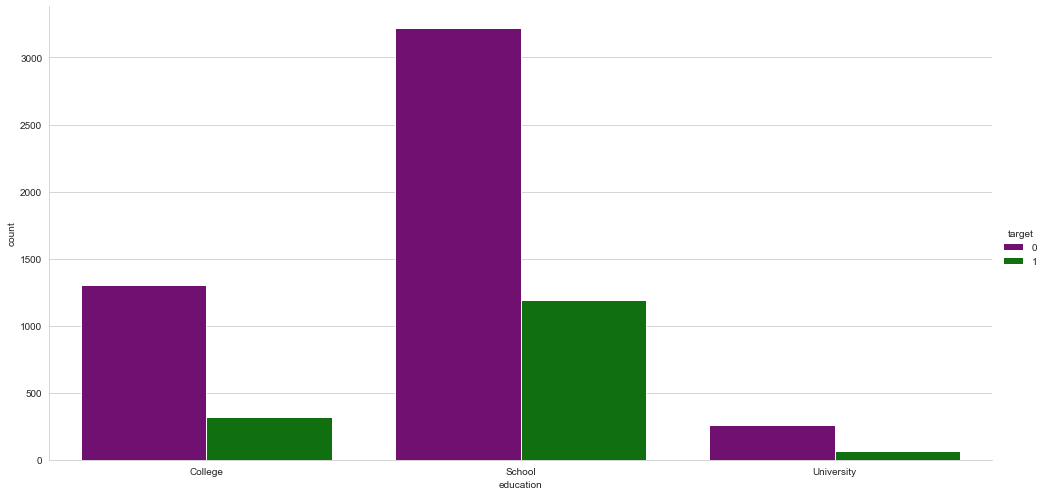

In [72]:
custom = {0:'purple',
          1:'green'}

sns.catplot(x='education',data=df,hue='target',kind='count',palette=custom,height=7,aspect=2)

#### seems like people who were in school had more affairs on the count level

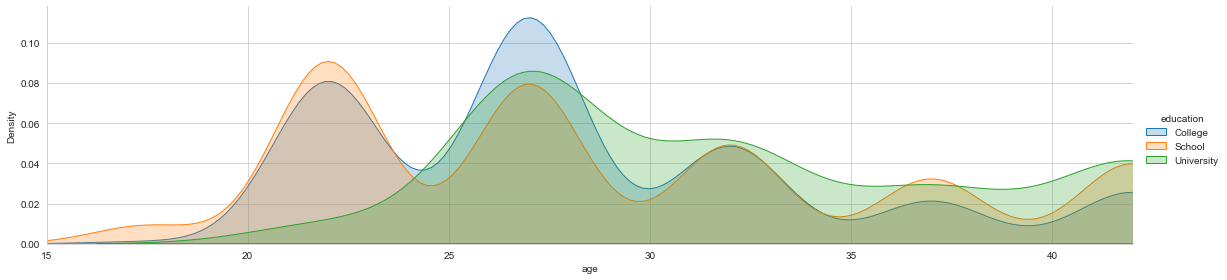

In [73]:
pl = sns.FacetGrid(df,hue='education',aspect=4,height=4)

pl.map(sns.kdeplot,'age',fill=True)

pl.set(xlim=(15,df.age.max()))

pl.add_legend()

#### college has the most density in this data set with the range of 25-30 years old

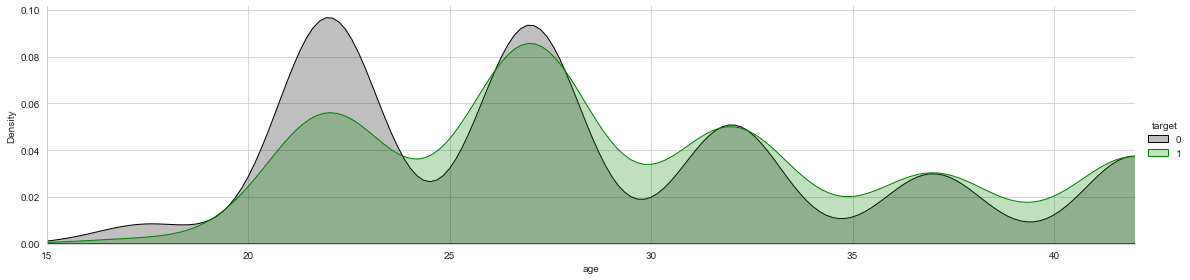

In [74]:
custom = {0:'black',
          1:'green'}

pl = sns.FacetGrid(df,hue='target',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'age',fill=True)

pl.set(xlim=(15,df.age.max()))

pl.add_legend()

#### people who are young in their year range of 20-25 dont tend to have affairs compared to other age ranges

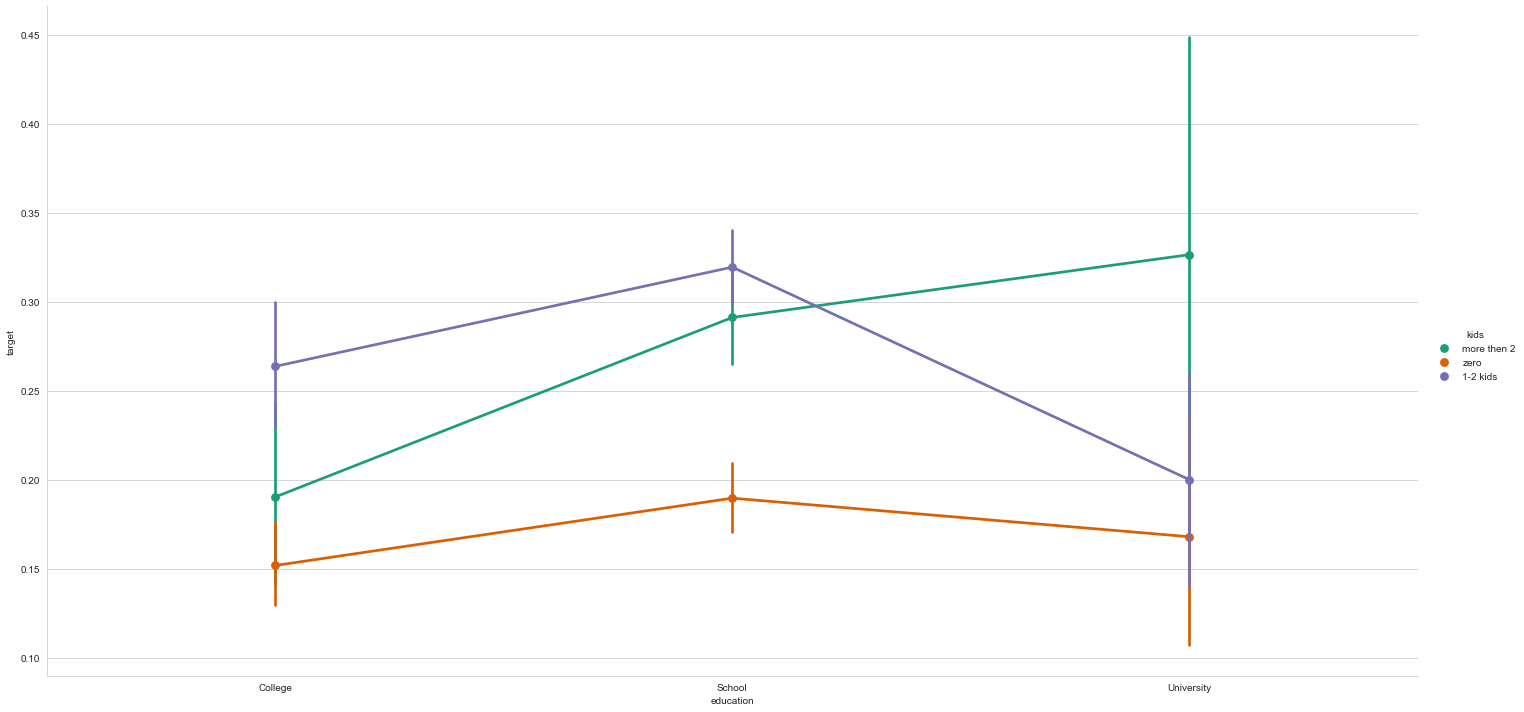

In [75]:


pl = sns.catplot(y='target',x='education',data=df,kind='point',hue='kids',height=10,aspect=2,palette='Dark2')

#### the biggest leap we see is the university educated and having more then 2 kids

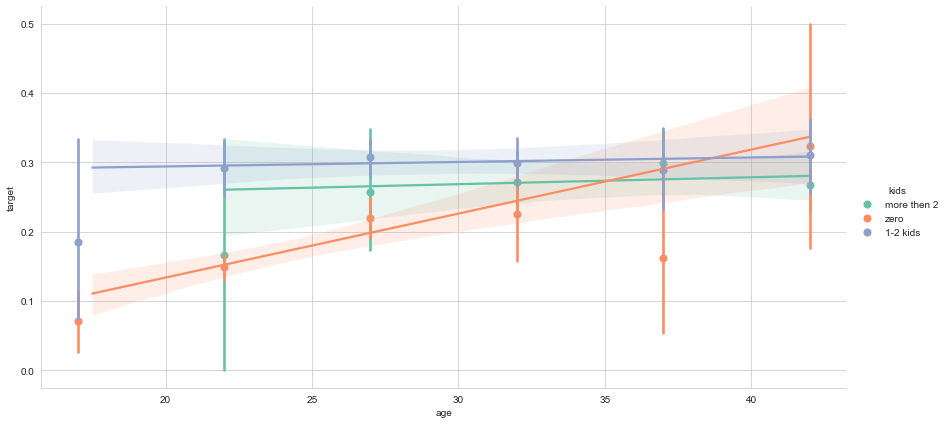

In [76]:
sns.lmplot(x='age',y='target',data=df,hue='kids',palette='Set2',x_bins=[range(1,80)],height=6,aspect=2)

#### the very clear linear relationship I see is zero kids and age

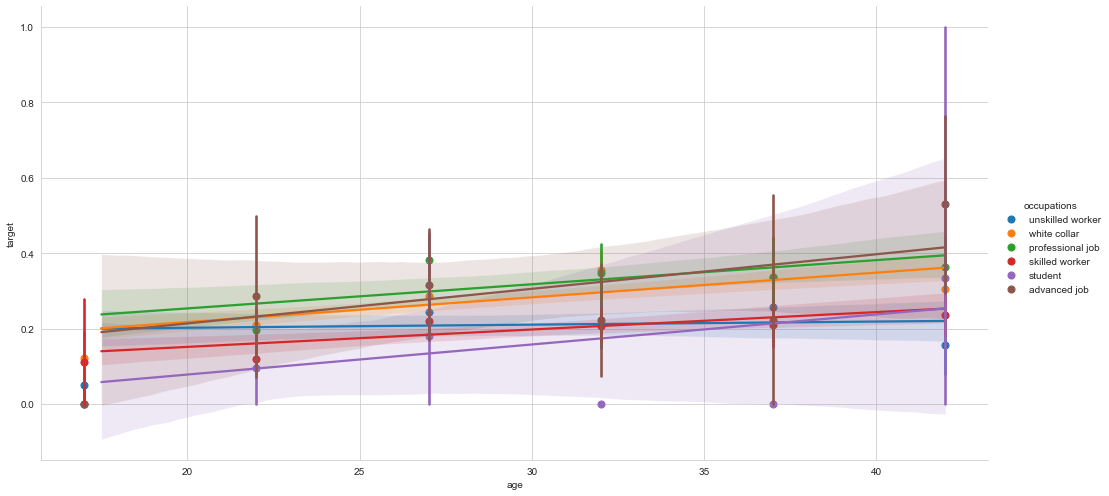

In [77]:


sns.lmplot(x='age',y='target',data=df,hue='occupations',x_bins=[range(1,80)],height=7,aspect=2)

#### definately we do see some linear relationship here

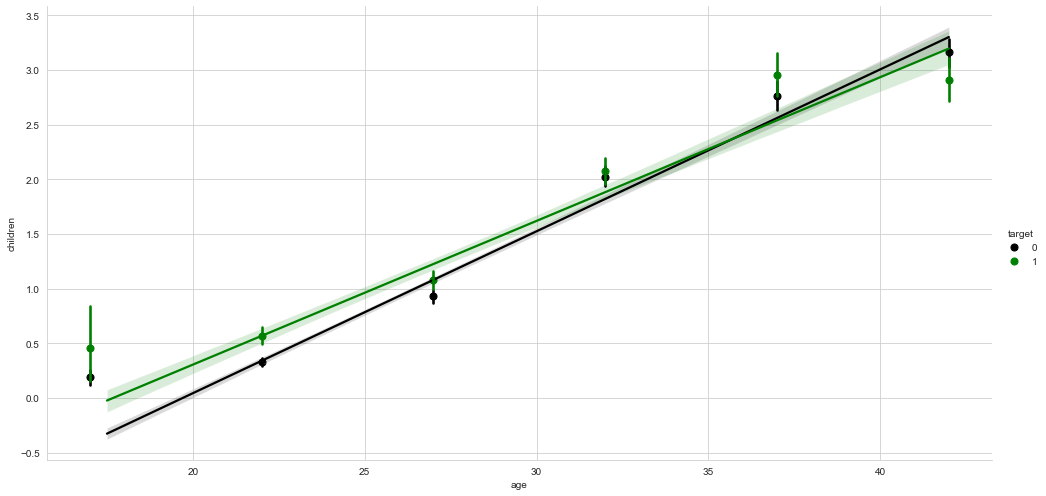

In [78]:
custom = {0:'black',
          1:'green'}

sns.lmplot(x='age',y='children',data=df,hue='target',x_bins=[range(15,80)],height=7,aspect=2,palette=custom)

#### really interesting, both targets have the same or similar linear relationship to years married and age

In [79]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations,husb_occupation,affair_binary,target
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker,professional job,0.0,0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar,skilled worker,3.0,1
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar,professional job,1.0,1
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job,professional job,1.0,1
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker,5.0,1


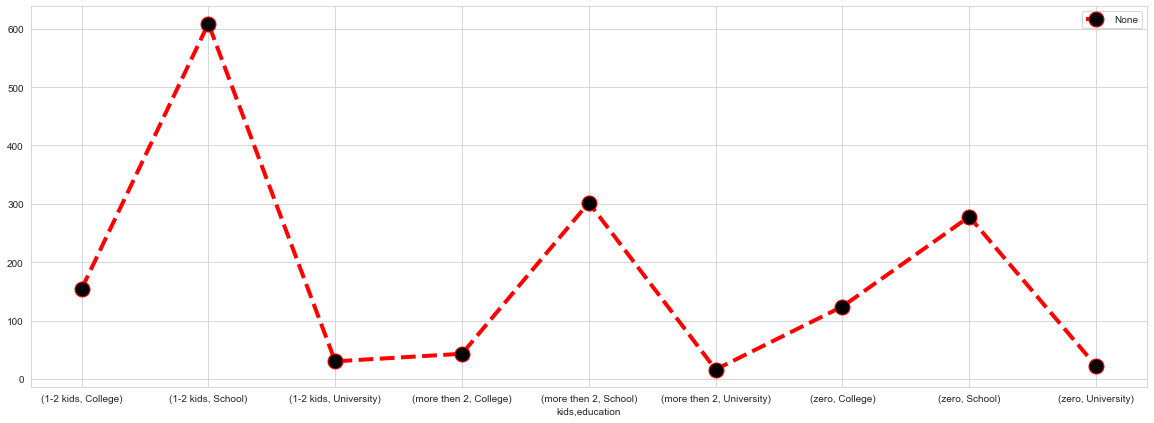

In [80]:
df.groupby(['education','kids'])['target'].sum().unstack().unstack().plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',markersize=15,linestyle='dashed',linewidth=4,color='red')

#### the most affairs are from people who are school educated with 1-2 kids

In [81]:
df.groupby(['education','kids'])['target'].sum().unstack()

kids,1-2 kids,more then 2,zero
education,,,
College,154,43,124
School,609,302,278
University,30,16,22


In [82]:
heat = df.groupby(['years_married','kids','religion','education','occupations'])['target'].sum().unstack().unstack().unstack().fillna(0)

heat

occupations                advanced job                                  \
education                       College                          School   
religion                        Neutral Not Religious Religious Neutral   
years_married  kids                                                       
0-5 years      1-2 kids             1.0           0.0       0.0     1.0   
               more then 2          0.0           0.0       0.0     0.0   
               zero                 0.0           1.0       0.0     0.0   
5-10 years     1-2 kids             0.0           1.0       0.0     1.0   
               more then 2          0.0           0.0       0.0     0.0   
               zero                 0.0           1.0       0.0     1.0   
above 10 years 1-2 kids             1.0           1.0       0.0     0.0   
               more then 2          2.0           0.0       0.0     1.0   
               zero                 0.0           0.0       0.0     0.0   

occupations                                                                  \
education                                          University                 
religion                   Not Religious Religious    Neutral Not Religious   
years_married  kids                                                           
0-5 years      1-2 kids              0.0       0.0        0.0           0.0   
               more then 2           0.0       0.0        0.0           0.0   
               zero                  0.0       0.0        3.0           3.0   
5-10 years     1-2 kids              0.0       0.0        1.0           1.0   
               more then 2           0.0       0.0        0.0           0.0   
               zero                  0.0       0.0        3.0           1.0   
above 10 years 1-2 kids              1.0       0.0        2.0           2.0   
               more then 2           0.0       0.0        2.0           1.0   
               zero                  0.0       0.0        0.0           0.0   

occupations                          professional job  ... unskilled worker  \
education                                     College  ...       University   
religion                   Religious          Neutral  ...        Religious   
years_married  kids                                    ...                    
0-5 years      1-2 kids          0.0              0.0  ...              0.0   
               more then 2       0.0              0.0  ...              0.0   
               zero              1.0              7.0  ...              0.0   
5-10 years     1-2 kids          0.0              4.0  ...              0.0   
               more then 2       0.0              0.0  ...              0.0   
               zero              0.0              8.0  ...              0.0   
above 10 years 1-2 kids          0.0              4.0  ...              0.0   
               more then 2       1.0              3.0  ...              0.0   
               zero              0.0              1.0  ...              0.0   

occupations                white collar                                  \
education                       College                          School   
religion                        Neutral Not Religious Religious Neutral   
years_married  kids                                                       
0-5 years      1-2 kids             3.0           1.0       0.0    31.0   
               more then 2          0.0           0.0       0.0     2.0   
               zero                15.0           7.0       0.0    82.0   
5-10 years     1-2 kids            10.0           6.0       2.0   118.0   
               more then 2          1.0           0.0       0.0    10.0   
               zero                 4.0           2.0       0.0    51.0   
above 10 years 1-2 kids            10.0           2.0       3.0    98.0   
               more then 2          5.0           0.0       1.0   118.0   
               zero                 2.0           1.0       0.0    1

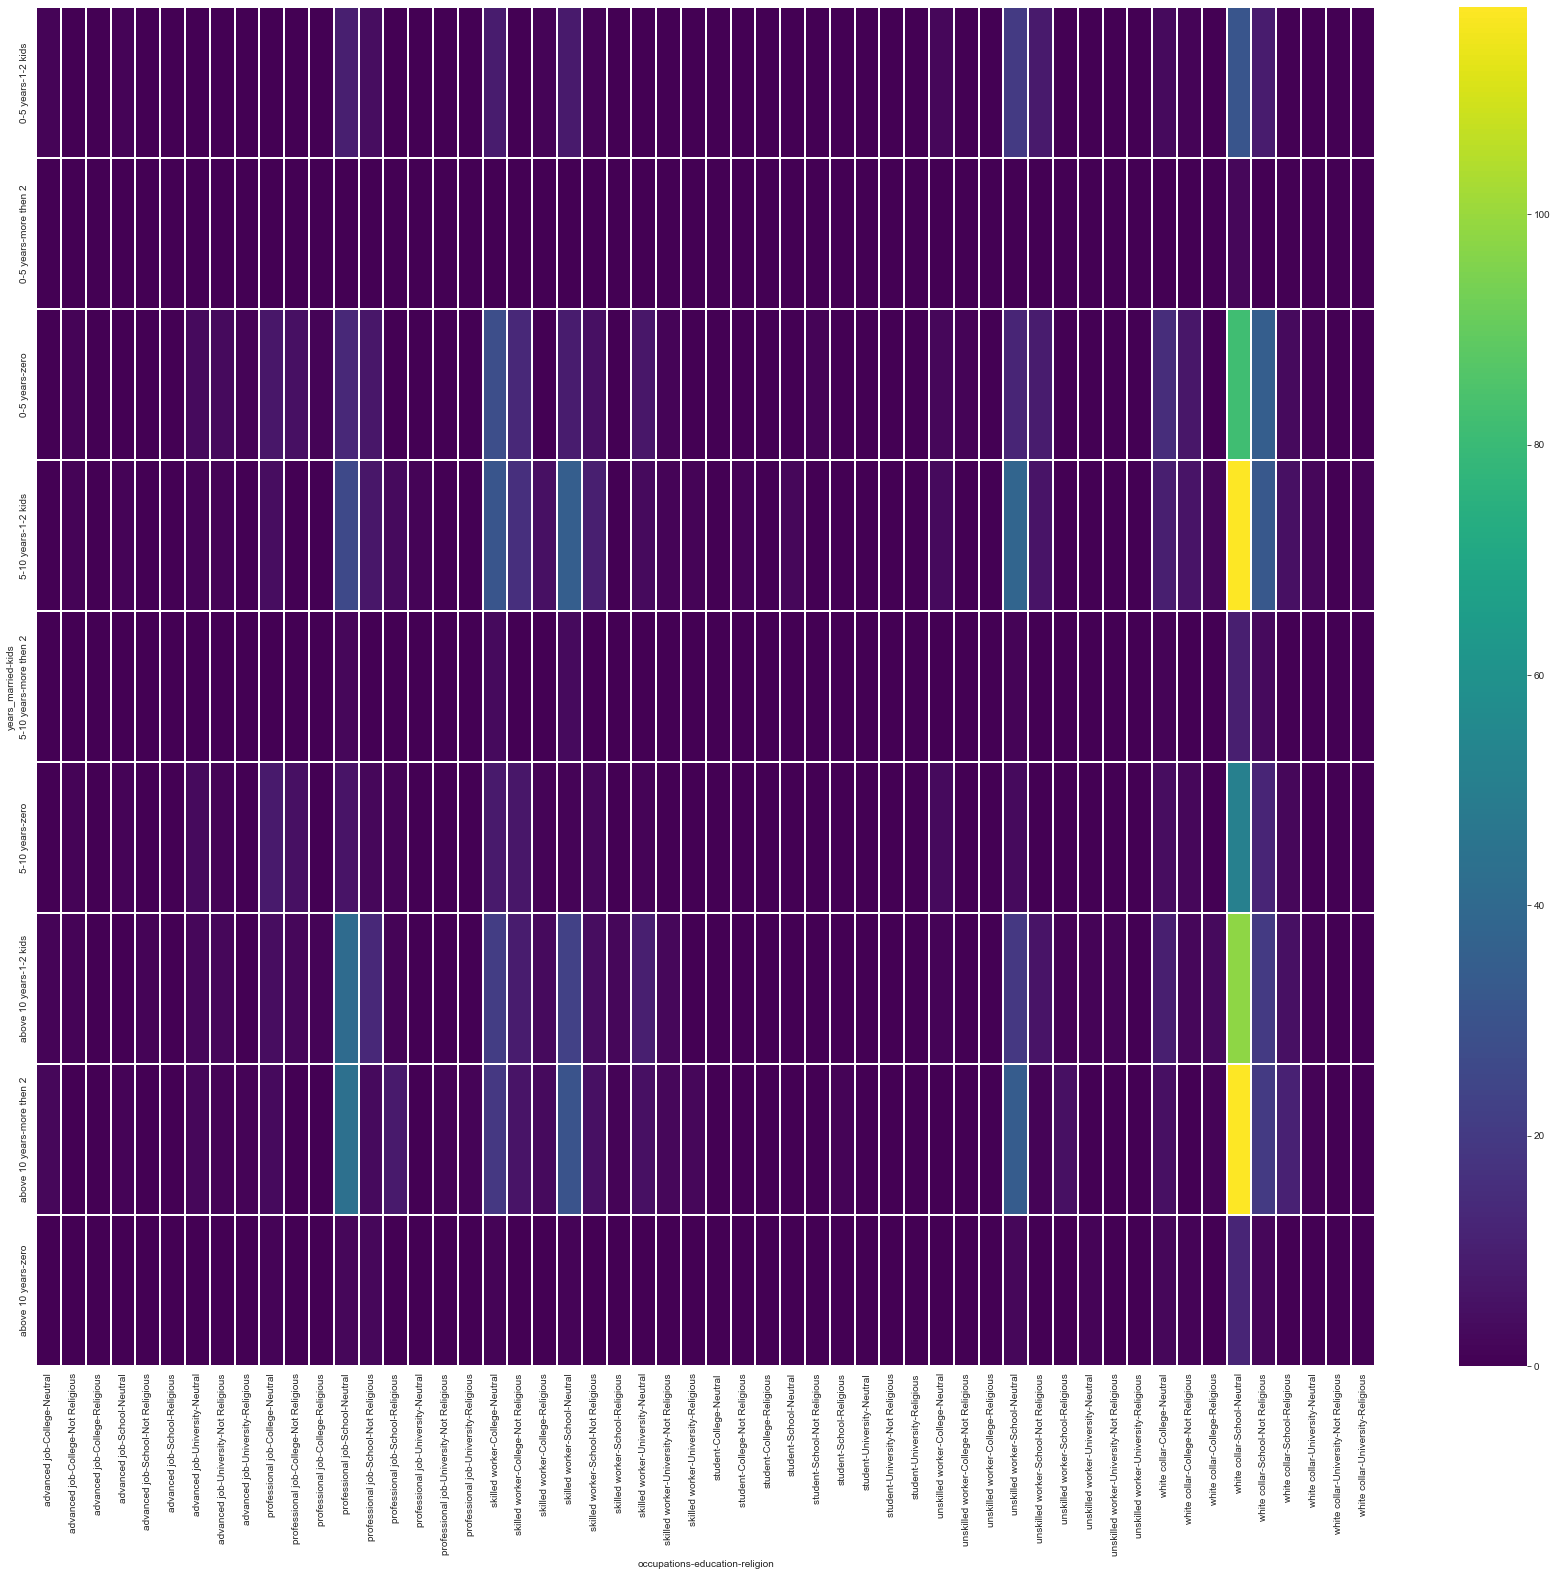

In [83]:
fig, ax = plt.subplots(figsize=(30,25)) 

sns.heatmap(heat,linewidths=0.1,ax=ax,cmap='viridis')

#### this is quite interesting, we can derive a lot of information from this

In [84]:
#### We have done enough for EDA, now lets move to modelling part

In [85]:
######################################################################
############## Part VI - Classification
######################################################################


In [86]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations,husb_occupation,affair_binary,target
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker,professional job,0.0,0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar,skilled worker,3.0,1
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar,professional job,1.0,1
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job,professional job,1.0,1
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker,5.0,1


In [87]:
X = df.drop(columns=['affairs','years_married','kids','religion','education','occupations','husb_occupation','affair_binary'])

X.head()

#### first we will do without doing any much changes to the data set

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,target
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,1
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [88]:
corr = X.corr()

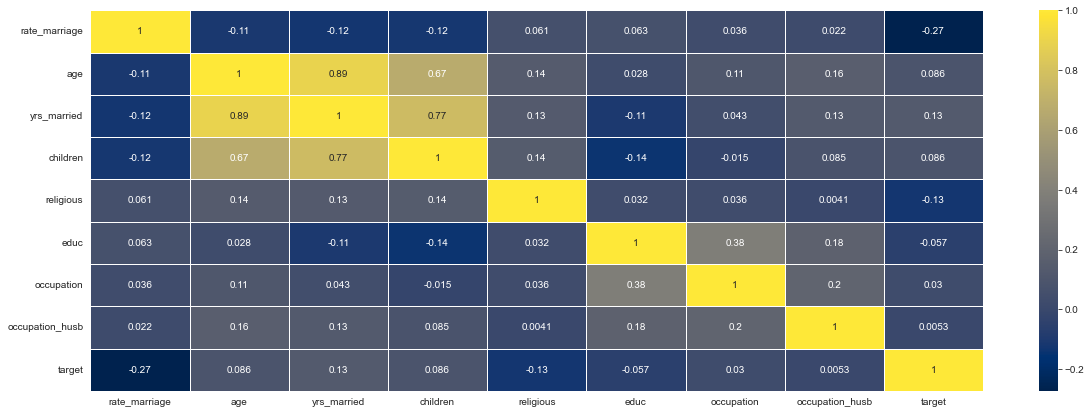

In [89]:
fig, ax = plt.subplots(figsize=(20,7)) 

sns.heatmap(corr,annot=True,linewidths=0.5,ax=ax,cmap='cividis')


In [90]:
from sklearn.model_selection import train_test_split


In [91]:
X.drop(columns='target',inplace=True)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [92]:
y = df.target

y.head()

0    0
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [95]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rate_marriage', 'children', 'religious', 'educ',
                                   'occupation', 'occupation_husb','age','yrs_married'])
    ])


In [96]:
from sklearn.pipeline import Pipeline


In [97]:
from sklearn.linear_model import LogisticRegression


In [98]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [99]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rate_marriage', 'children',
                                                   'religious', 'educ',
                                                   'occupation',
                                                   'occupation_husb', 'age',
                                                   'yrs_married'])])),
                ('classifier', LogisticRegression())])

In [100]:
y_predict = model.predict(X_test)

In [101]:
from sklearn import metrics


In [102]:
metrics.accuracy_score(y_test,y_predict)

0.7539267015706806

In [103]:
print(metrics.classification_report(y_test,y_predict))              #### not a bad model, our data size is too small and is very unbalanced with the ratio hence we see this

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1420
           1       0.57      0.17      0.27       490

    accuracy                           0.75      1910
   macro avg       0.67      0.56      0.56      1910
weighted avg       0.72      0.75      0.70      1910



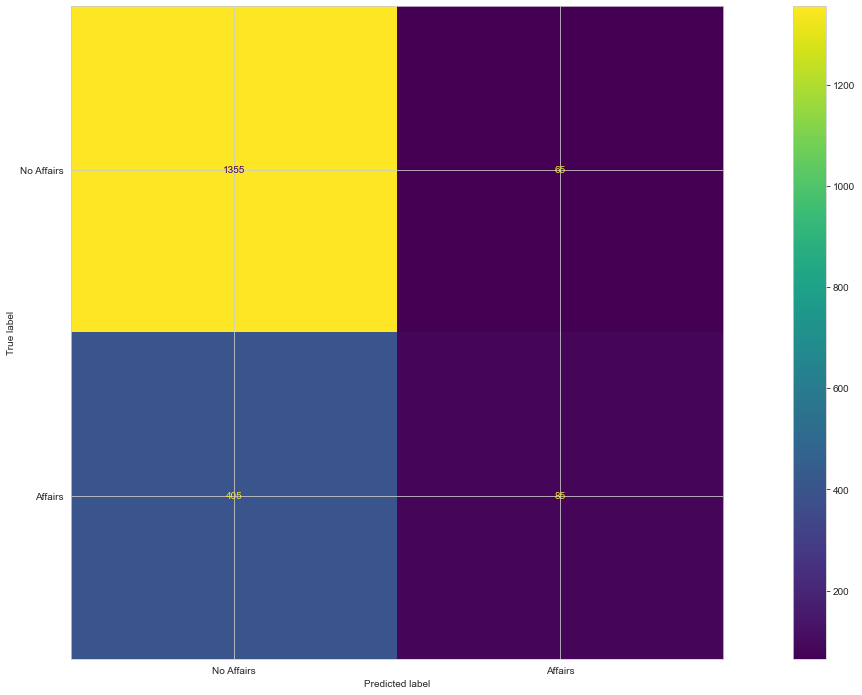

In [104]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['No Affairs','Affairs']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(25,12))

disp.plot(ax=ax)


In [105]:
#### now we will do by taking care of any multicollinearity

from statsmodels.tools.tools import add_constant

X_with_constant = add_constant(X)

X_with_constant.head()                    #### setting up Vif


,const,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,1.0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,1.0,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,1.0,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0
3,1.0,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0
4,1.0,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [106]:
vif = pd.DataFrame()                      #### this is extremely helpful and important to know which col can be a problem


In [107]:
vif["Feature"] = X_with_constant.columns


In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]


In [109]:
vif                         #### rule of thumb is to drop any cols which are above 5 as they can lead to multicollinearity, but I prefer the other way around

,Feature,VIF
0,const,90.784314
1,rate_marriage,1.027526
2,age,5.420820
3,yrs_married,7.002575
4,children,2.453550
5,religious,1.033334
6,educ,1.292076
7,occupation,1.206933
8,occupation_husb,1.082718


In [110]:
from sklearn.decomposition import PCA                 #### love PCA


In [111]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]), ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb'])
    ])


In [112]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [113]:
model.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['rate_marriage', 'age',
                                                   'yrs_married', 'children',
                                                   'religious', 'educ',
                                                   'occupation',
                                                   'occupation_husb'])])),
                ('classifier', LogisticRegression())])

In [114]:
y_predict = model.predict(X_test)


In [115]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1420
           1       0.56      0.16      0.25       490

    accuracy                           0.75      1910
   macro avg       0.66      0.56      0.55      1910
weighted avg       0.71      0.75      0.70      1910



In [116]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rate_marriage', 'children', 'religious', 'educ',
                                   'occupation', 'occupation_husb','age','yrs_married'])
    ])


In [117]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [118]:
model.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rate_marriage', 'children',
                                                   'religious', 'educ',
                                                   'occupation',
                                                   'occupation_husb', 'age',
                                                   'yrs_married'])])),
                ('classifier', LogisticRegression())])

In [119]:
y_predict = model.predict(X_test)


In [120]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1420
           1       0.57      0.17      0.27       490

    accuracy                           0.75      1910
   macro avg       0.67      0.56      0.56      1910
weighted avg       0.72      0.75      0.70      1910



In [121]:
from sklearn.linear_model import RidgeClassifier           #### Now we will see the same with Ridge

In [122]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rate_marriage', 'children', 'religious', 'educ',
                                   'occupation', 'occupation_husb','age','yrs_married'])
    ])


In [123]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RidgeClassifier(alpha=1.0))
])


In [124]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rate_marriage', 'children',
                                                   'religious', 'educ',
                                                   'occupation',
                                                   'occupation_husb', 'age',
                                                   'yrs_married'])])),
                ('classifier', RidgeClassifier())])

In [125]:
y_predict = model.predict(X_test)

In [126]:
metrics.accuracy_score(y_test,y_predict)

0.7528795811518325

In [127]:
print(metrics.classification_report(y_test,y_predict))            #### even with ridge classifier we are getting ok result
                                                                  #### the problem is the support and how small our data set is to train the model

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1420
           1       0.57      0.16      0.25       490

    accuracy                           0.75      1910
   macro avg       0.67      0.56      0.55      1910
weighted avg       0.72      0.75      0.70      1910



In [128]:
df.head()                        #### now we will introduce the feature engineered cols and drop the corresponding numerical cols

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,years_married,kids,religion,education,occupations,husb_occupation,affair_binary,target
0,1,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,5-10 years,more then 2,Neutral,College,unskilled worker,professional job,0.0,0
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,above 10 years,more then 2,Not Religious,School,white collar,skilled worker,3.0,1
2,2,22.0,2.0,0.0,1.0,16.0,3.0,5.0,1.400000,0-5 years,zero,Not Religious,College,white collar,professional job,1.0,1
3,2,37.0,16.0,4.0,3.0,16.0,5.0,5.0,0.727273,above 10 years,more then 2,Neutral,College,professional job,professional job,1.0,1
4,2,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker,5.0,1


In [129]:
X = df.drop(columns=['yrs_married','children','religious','educ','occupation','occupation_husb','affairs','affair_binary','target'])


In [130]:
X.head()

,rate_marriage,age,years_married,kids,religion,education,occupations,husb_occupation
0,1,32.0,5-10 years,more then 2,Neutral,College,unskilled worker,professional job
1,1,27.0,above 10 years,more then 2,Not Religious,School,white collar,skilled worker
2,2,22.0,0-5 years,zero,Not Religious,College,white collar,professional job
3,2,37.0,above 10 years,more then 2,Neutral,College,professional job,professional job
4,2,27.0,5-10 years,1-2 kids,Not Religious,School,white collar,skilled worker


In [131]:
y = df['target']

y.head()

0    0
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [133]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]), ['rate_marriage', 'age']),
        ('cat', OneHotEncoder(drop='first'), ['years_married', 'kids','religion','education','occupations','husb_occupation'])

    ])


In [134]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [135]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['rate_marriage', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['years_married', 'kids',
                                                   'religion', 'education',
                                                   'occupations',
                                                   'husb_occupation'])])),
                ('classifier', LogisticRegression())])

In [136]:
y_predict = model.predict(X_test)

In [137]:
print(metrics.classification_report(y_test,y_predict))            #### not much difference between this version to the original version we had

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1420
           1       0.54      0.13      0.21       490

    accuracy                           0.75      1910
   macro avg       0.65      0.55      0.53      1910
weighted avg       0.71      0.75      0.69      1910



In [138]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rate_marriage', 'age']),
        ('cat', OneHotEncoder(drop='first'), ['years_married', 'kids','religion','education','occupations','husb_occupation'])

    ])

#### lets see without PCA

In [139]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [140]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rate_marriage', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['years_married', 'kids',
                                                   'religion', 'education',
                                                   'occupations',
                                                   'husb_occupation'])])),
                ('classifier', LogisticRegression())])

In [141]:
y_predict = model.predict(X_test)

In [142]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1420
           1       0.55      0.18      0.27       490

    accuracy                           0.75      1910
   macro avg       0.66      0.57      0.56      1910
weighted avg       0.71      0.75      0.70      1910



In [143]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [144]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rate_marriage', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['years_married', 'kids',
                                                   'religion', 'education',
                                                   'occupations',
                                                   'husb_occupation'])])),
                ('classifier', RandomForestClassifier())])

In [145]:
y_predict = model.predict(X_test)

In [146]:
print(metrics.classification_report(y_test,y_predict))               #### no wonder random forest is not helping here because our data set is so imbalanced

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1420
           1       0.44      0.27      0.33       490

    accuracy                           0.73      1910
   macro avg       0.61      0.58      0.58      1910
weighted avg       0.69      0.73      0.70      1910



In [147]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['years_married', 'kids','religion','education','occupations','husb_occupation']),
        ('num', StandardScaler(), ['rate_marriage','age'])
    ])


In [148]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RidgeClassifier(alpha=1.0))
])


In [149]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['years_married', 'kids',
                                                   'religion', 'education',
                                                   'occupations',
                                                   'husb_occupation']),
                                                 ('num', StandardScaler(),
                                                  ['rate_marriage', 'age'])])),
                ('classifier', RidgeClassifier())])

In [150]:
y_predict = model.predict(X_test)

In [151]:
metrics.accuracy_score(y_test,y_predict)

0.7528795811518325

In [152]:
print(metrics.classification_report(y_test,y_predict))      


              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1420
           1       0.56      0.16      0.25       490

    accuracy                           0.75      1910
   macro avg       0.67      0.56      0.55      1910
weighted avg       0.72      0.75      0.70      1910



In [153]:
from sklearn.model_selection import GridSearchCV


In [154]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [155]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=3)
model_grid.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.726 total time=   0.6s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.730 total time=   0.7s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.731 total time=   0.6s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.738 total time=   0.5s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.721 total time=   0.7s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_

[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.751 total time=   0.5s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.751 total time=   1.0s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.751 total time=   1.0s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.759 total time=   1.1s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.762 total time=   1.2s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.747 total time=

[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.765 total time=   0.9s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.763 total time=   1.0s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.759 total time=   1.7s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.760 total time=   1.4s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.763 total time=   1.4s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.765 total time=

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.755 total time=   1.4s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.765 total time=   1.6s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.754 total time=   1.4s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.757 total time=   0.4s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.759 total time=   0.4s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.758 total time=   0.4s
[CV 

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.762 total time=   0.4s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.769 total time=   0.4s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.756 total time=   0.4s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.760 total time=   1.3s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.755 total time=   1.3s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.761 total time=   0.9s
[CV 

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.762 total time=   1.0s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.767 total time=   1.3s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.767 total time=   1.1s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.760 total time=   1.5s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.760 total time=   1.6s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.758 total time=   1.7s
[CV 

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.734 total time=   1.7s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.755 total time=   2.0s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.737 total time=   1.6s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.751 total time=   0.5s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.751 total time=   0.5s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.754 total time=   0.4s
[

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.756 total time=   0.4s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.762 total time=   0.6s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.755 total time=   0.5s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.759 total time=   1.2s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.761 total time=   1.1s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.759 total time=   1.0

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.762 total time=   1.0s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.768 total time=   1.0s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.762 total time=   0.9s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.758 total time=   1.5s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.761 total time=   1.5s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.761 total time=   1.6

[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.753 total time=   1.9s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.760 total time=   1.6s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.747 total time=   1.9s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.754 total time=   0.6s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.759 total time=   0.7s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.756 total time=   0.5s
[

[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.754 total time=   0.6s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.760 total time=   0.5s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.759 total time=   0.4s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.761 total time=   0.9s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.761 total time=   0.9s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.756 total time=   1.0s
[CV 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['years_married',
                                                                          'kids',
                                                                          'religion',
                                                                          'education',
                                                                          'occupations',
                                                                          'husb_occupation']),
                                                                        ('num',
                                                                         StandardScaler(),
                                          

In [156]:
best_model = model_grid.best_estimator_

In [157]:
y_predict = best_model.predict(X_test)

In [158]:
print(metrics.classification_report(y_test,y_predict))               #### the model is not improving beyond this point it seems so we will halt further phase at this point

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1420
           1       0.55      0.14      0.22       490

    accuracy                           0.75      1910
   macro avg       0.66      0.55      0.54      1910
weighted avg       0.71      0.75      0.69      1910



In [159]:
from imblearn.over_sampling import ADASYN        #### one last try

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [161]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]), ['rate_marriage', 'age']),
        ('cat', OneHotEncoder(drop='first'), ['years_married', 'kids','religion','education','occupations','husb_occupation'])

    ])


In [162]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier


In [163]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resample', ADASYN(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


In [164]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__colsample_bytree': [0.3, 0.7],
    'classifier__subsample': [0.5, 0.8]
}


In [165]:
from sklearn.model_selection import RandomizedSearchCV


In [166]:
%%time

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=2, random_state=42)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.0s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.1s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   1.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   1.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimator

[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.5; total time=   3.0s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   1.0s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   1.0s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=1

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   1.7s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   1.7s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   1.6s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   1.5s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.5; total time=   1.6s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimato

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.7s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimato

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.0s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.0s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimat

In [167]:
best_model = random_search.best_estimator_

In [168]:
y_predict = best_model.predict(X_test)

In [169]:
print(metrics.classification_report(y_test,y_predict))            #### made it worst honestly

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       958
           1       0.48      0.28      0.35       316

    accuracy                           0.75      1274
   macro avg       0.63      0.59      0.60      1274
weighted avg       0.71      0.75      0.72      1274



In [170]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_jobs=-1))
])


In [171]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=3)
model_grid.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.722 total time=   1.4s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.750 total time=   1.5s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.739 total time=   1.3s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.723 total time=   1.4s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.728 total time=   1.3s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_

[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.752 total time=   1.0s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.744 total time=   2.1s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.753 total time=   2.1s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.771 total time=   2.2s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.754 total time=   2.2s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.764 total time=

[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.761 total time=   1.7s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.766 total time=   1.9s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.750 total time=   2.6s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.761 total time=   2.4s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.769 total time=   2.6s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.754 total time=

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.767 total time=   2.4s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.758 total time=   2.4s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.754 total time=   2.4s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.748 total time=   0.8s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.756 total time=   0.8s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.767 total time=   1.0s
[CV 

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.769 total time=   0.5s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.766 total time=   0.5s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.767 total time=   0.7s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.742 total time=   1.2s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.753 total time=   1.3s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.768 total time=   1.5s
[CV 

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.767 total time=   1.1s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.765 total time=   1.3s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.764 total time=   1.3s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.747 total time=   2.0s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.760 total time=   2.1s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.765 total time=   2.1s
[CV 

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.750 total time=   3.6s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.745 total time=   3.6s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.741 total time=   3.5s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.739 total time=   1.1s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.750 total time=   1.2s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.768 total time=   1.0s
[

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.766 total time=   1.0s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.754 total time=   1.0s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.769 total time=   1.0s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.750 total time=   1.9s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.759 total time=   2.0s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.765 total time=   2.1

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.771 total time=   1.7s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.757 total time=   1.8s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.765 total time=   1.8s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.752 total time=   2.5s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.758 total time=   2.7s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.769 total time=   2.8

[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.763 total time=   3.4s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.755 total time=   3.3s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.759 total time=   3.5s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.743 total time=   1.1s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.753 total time=   1.2s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.768 total time=   1.1s
[

[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.767 total time=   0.9s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.753 total time=   1.0s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.760 total time=   0.9s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.751 total time=   1.9s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.761 total time=   1.7s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.768 total time=   1.8s
[CV 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components='mle'))]),
                                                                         ['rate_marriage',
                                                                          'age']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                 

In [172]:
best_model = model_grid.best_estimator_

In [173]:
y_predict = best_model.predict(X_test)

In [174]:
print(metrics.classification_report(y_test,y_predict))           #### we will move to another affair dataset which contains both female and male

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       958
           1       0.55      0.15      0.24       316

    accuracy                           0.76      1274
   macro avg       0.66      0.56      0.55      1274
weighted avg       0.72      0.76      0.70      1274



In [175]:
######################################################################
############## Part VII - Affairs_2
######################################################################


In [176]:
df = pd.read_csv('Affairs_2.csv')                  #### we will not be doing much EDA on this one, straight to the point

In [177]:
df.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [178]:
df.drop(columns='Unnamed: 0',inplace=True)

df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [179]:
corr = df.corr()

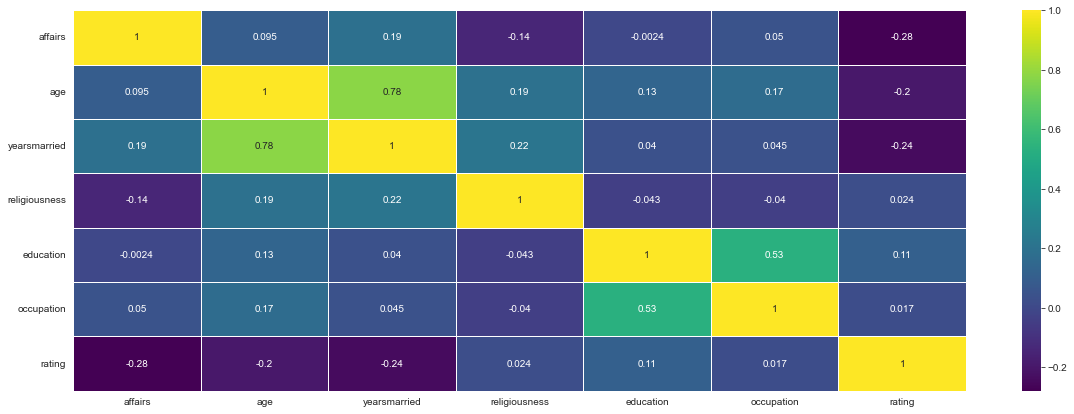

In [180]:
fig, ax = plt.subplots(figsize=(20,7)) 

sns.heatmap(corr,annot=True,linewidths=0.5,ax=ax,cmap='viridis')


In [181]:
df.isnull().any()

affairs          False
gender           False
age              False
yearsmarried     False
children         False
religiousness    False
education        False
occupation       False
rating           False
dtype: bool

In [182]:
df[df.duplicated()]

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
20,0,female,22.0,1.50,no,2,16,5,5
21,0,female,22.0,1.50,no,2,16,5,5
78,0,female,22.0,1.50,no,3,16,5,5
124,0,female,22.0,1.50,no,3,16,5,5
155,0,male,42.0,15.00,yes,4,20,6,3
170,0,male,57.0,15.00,yes,4,20,6,5
189,0,male,32.0,15.00,yes,1,14,5,5
253,0,female,27.0,7.00,yes,4,17,1,4
257,0,male,42.0,15.00,yes,2,20,6,4
270,0,male,37.0,15.00,yes,4,20,6,5


In [183]:
df = df.drop_duplicates()

In [184]:
df[df.duplicated()]

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        577 non-null    int64  
 1   gender         577 non-null    object 
 2   age            577 non-null    float64
 3   yearsmarried   577 non-null    float64
 4   children       577 non-null    object 
 5   religiousness  577 non-null    int64  
 6   education      577 non-null    int64  
 7   occupation     577 non-null    int64  
 8   rating         577 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 45.1+ KB


In [186]:
df.affairs.value_counts()

0     428
7      42
12     37
1      34
3      19
2      17
Name: affairs, dtype: int64

In [187]:
df['Affairs'] = df.affairs.apply(lambda x:0 if x==0 else 1)

In [188]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,Affairs
0,0,male,37.0,10.00,no,3,18,7,4,0
1,0,female,27.0,4.00,no,4,14,6,4,0
2,0,female,32.0,15.00,yes,1,12,1,4,0
3,0,male,57.0,15.00,yes,5,18,6,5,0
4,0,male,22.0,0.75,no,2,17,6,3,0


In [189]:
df.Affairs.value_counts()                  #### this will be a problem, low data set and imbalanced target values

0    428
1    149
Name: Affairs, dtype: int64

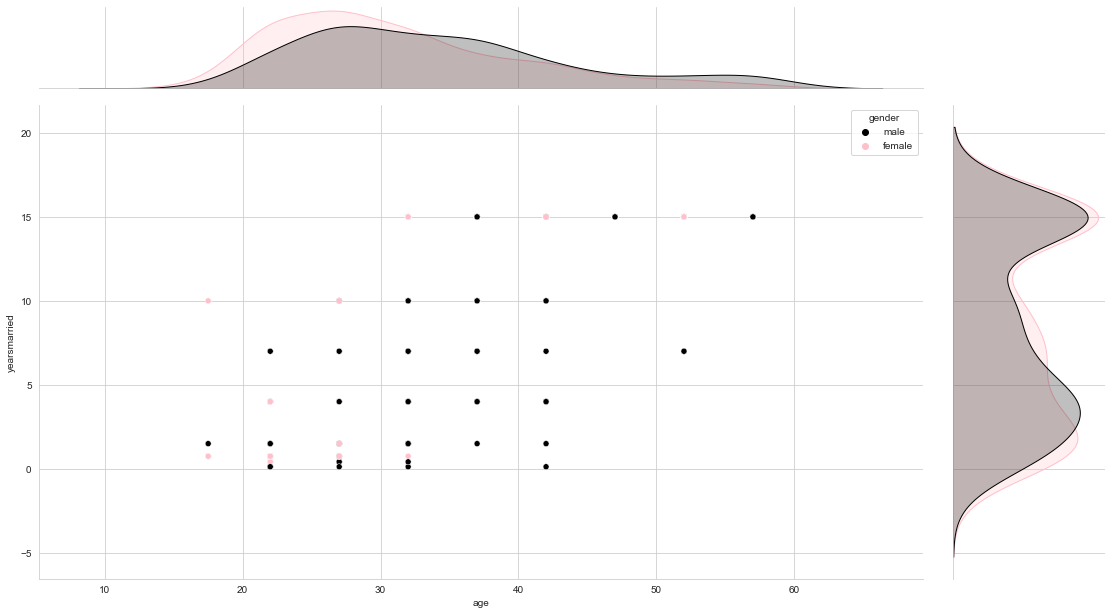

In [190]:
custom = {'male':'black',
          'female':'pink'}

g = sns.jointplot(x=df['age'],y=df['yearsmarried'],data=df,hue='gender',palette=custom)

g.fig.set_size_inches(17,9)

#### clearly we can see that females are slightly more on the years married side

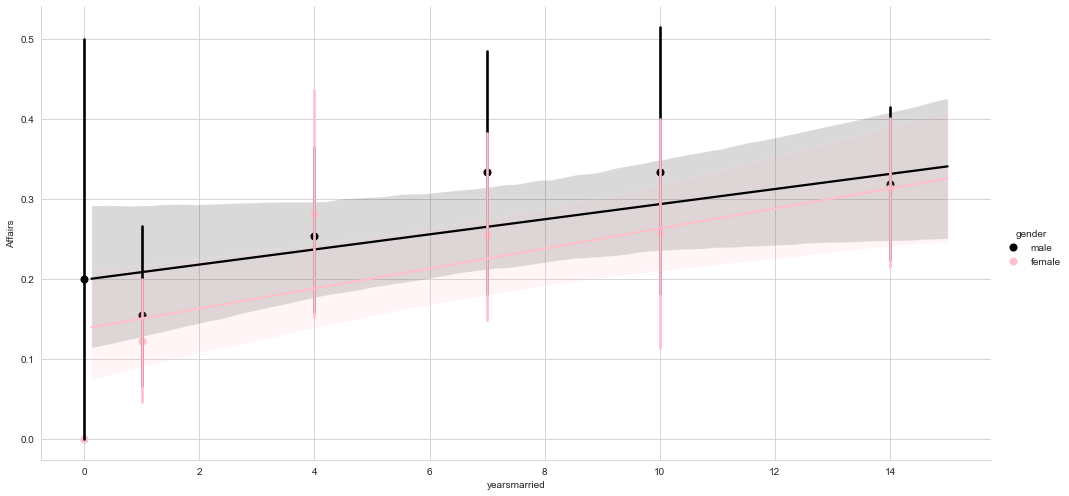

In [191]:
custom = {'male':'black',
          'female':'pink'}

sns.lmplot(x='yearsmarried',y='Affairs',data=df,hue='gender',height=7,aspect=2,palette=custom,x_bins=[range(0,15)])

#### seems like both genders have correlation to affairs and years they been married while males are marginally more likely then females

In [192]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,Affairs
0,0,male,37.0,10.00,no,3,18,7,4,0
1,0,female,27.0,4.00,no,4,14,6,4,0
2,0,female,32.0,15.00,yes,1,12,1,4,0
3,0,male,57.0,15.00,yes,5,18,6,5,0
4,0,male,22.0,0.75,no,2,17,6,3,0


In [193]:
df.age.value_counts()

27.0    150
32.0    111
22.0    108
37.0     84
42.0     53
47.0     23
57.0     21
52.0     21
17.5      6
Name: age, dtype: int64

In [194]:
df.yearsmarried.value_counts()

15.000    196
4.000     102
1.500      80
7.000      80
10.000     68
0.750      30
0.125      11
0.417      10
Name: yearsmarried, dtype: int64

In [195]:
df['years_married'] = df.yearsmarried.apply(lambda x:1 if x<1 else x)

In [196]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,Affairs,years_married
0,0,male,37.0,10.00,no,3,18,7,4,0,10.0
1,0,female,27.0,4.00,no,4,14,6,4,0,4.0
2,0,female,32.0,15.00,yes,1,12,1,4,0,15.0
3,0,male,57.0,15.00,yes,5,18,6,5,0,15.0
4,0,male,22.0,0.75,no,2,17,6,3,0,1.0


In [197]:
df.years_married.value_counts()

15.0    196
4.0     102
1.5      80
7.0      80
10.0     68
1.0      51
Name: years_married, dtype: int64

In [198]:
df.religiousness.value_counts()

4    182
2    154
3    124
5     70
1     47
Name: religiousness, dtype: int64

In [199]:
df['religion'] = df.religiousness.apply(lambda x:0 if x in [1,2] else (1 if x==3 else 2))


In [200]:
df.religion.value_counts()             #### 0 not religious, 1 neutral and 2 is religious

2    252
0    201
1    124
Name: religion, dtype: int64

In [201]:
##### Level of education. Coding: 9 = grade school, 12 = high school graduate, 
#### 14 = some college, 16 = college graduate, 
#### 17 = some graduate work, 18 = master's degree, 
#### 20 = Ph.D., M.D., or other advanced degree.

In [202]:
df['Education'] = df.education.apply(lambda x: 0 if x in [9,12] else (1 if x in [14,16] else (2 if x in [17,18] else 3)))

In [203]:
df.Education.value_counts()

1    255
2    198
3     75
0     49
Name: Education, dtype: int64

In [204]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,Affairs,years_married,religion,Education
0,0,male,37.0,10.00,no,3,18,7,4,0,10.0,1,2
1,0,female,27.0,4.00,no,4,14,6,4,0,4.0,2,1
2,0,female,32.0,15.00,yes,1,12,1,4,0,15.0,0,0
3,0,male,57.0,15.00,yes,5,18,6,5,0,15.0,2,2
4,0,male,22.0,0.75,no,2,17,6,3,0,1.0,0,2


In [205]:
df.occupation.value_counts()

5    194
6    138
1    106
4     67
3     46
7     13
2     13
Name: occupation, dtype: int64

In [206]:
df.rating.value_counts()

5    217
4    191
3     88
2     65
1     16
Name: rating, dtype: int64

In [207]:
df['Rating'] = df.rating.apply(lambda x:0 if x in [1,2] else (1 if x==3 else 2))


In [208]:
df.Rating.value_counts()               #### 0 not happy, 1 neutral, 2 not happy

2    408
1     88
0     81
Name: Rating, dtype: int64

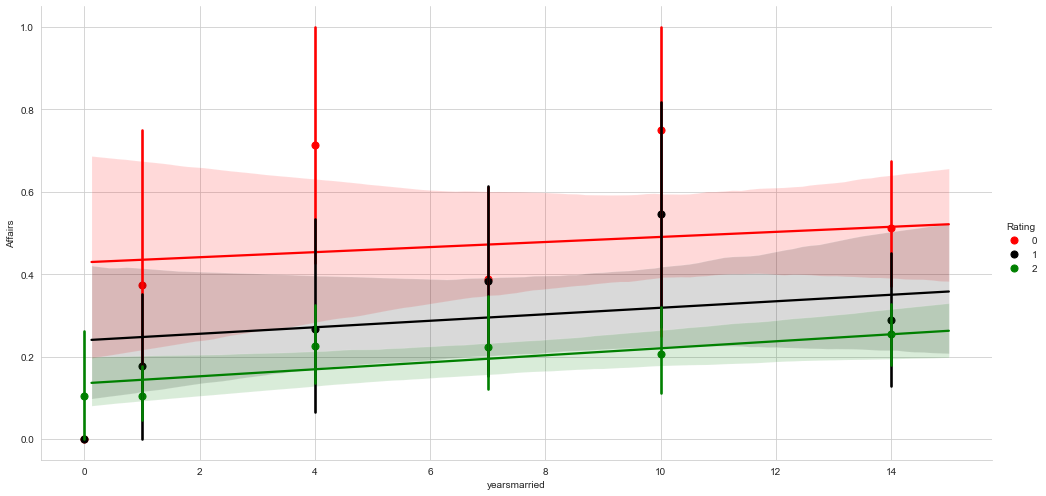

In [209]:
custom = {0:'red',
          1:'black',
          2:'green'}

sns.lmplot(x='yearsmarried',y='Affairs',data=df,hue='Rating',height=7,aspect=2,x_bins=[range(0,15)],palette=custom)

#### doesnt suprise us at all, if you not happy in marriage you tend to have affairs according to this very small data set we have, definately we not making any claims

In [210]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,Affairs,years_married,religion,Education,Rating
0,0,male,37.0,10.00,no,3,18,7,4,0,10.0,1,2,2
1,0,female,27.0,4.00,no,4,14,6,4,0,4.0,2,1,2
2,0,female,32.0,15.00,yes,1,12,1,4,0,15.0,0,0,2
3,0,male,57.0,15.00,yes,5,18,6,5,0,15.0,2,2,2
4,0,male,22.0,0.75,no,2,17,6,3,0,1.0,0,2,1


In [545]:
X = df.drop(columns=['affairs','yearsmarried','religiousness','education','occupation','rating'])

X.head()

,gender,age,children,Affairs,years_married,religion,Education,Rating
0,male,37.0,no,0,10.0,1,2,2
1,female,27.0,no,0,4.0,2,1,2
2,female,32.0,yes,0,15.0,0,0,2
3,male,57.0,yes,0,15.0,2,2,2
4,male,22.0,no,0,1.0,0,2,1


In [546]:
X = X[['Rating','age','gender','children','years_married','religion','Education']]

X.head()

,Rating,age,gender,children,years_married,religion,Education
0,2,37.0,male,no,10.0,1,2
1,2,27.0,female,no,4.0,2,1
2,2,32.0,female,yes,15.0,0,0
3,2,57.0,male,yes,15.0,2,2
4,1,22.0,male,no,1.0,0,2


In [548]:
y = df.Affairs

y.value_counts()

0    428
1    149
Name: Affairs, dtype: int64

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)


In [568]:
X.head()

,Rating,age,gender,children,years_married,religion,Education
0,2,37.0,male,no,10.0,1,2
1,2,27.0,female,no,4.0,2,1
2,2,32.0,female,yes,15.0,0,0
3,2,57.0,male,yes,15.0,2,2
4,1,22.0,male,no,1.0,0,2


In [569]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]), ['Rating', 'age','years_married','religion','Education']),
        ('cat', OneHotEncoder(drop='first'), ['gender','children'])

    ])


In [570]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [571]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Rating', 'age',
                                                   'years_married', 'religion',
                                                   'Education']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'children'])])),
                ('classifier', LogisticRegression())])

In [572]:
y_predict = model.predict(X_test)

In [573]:
print(metrics.classification_report(y_test,y_predict)) 

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       129
           1       0.45      0.11      0.18        45

    accuracy                           0.74       174
   macro avg       0.60      0.53      0.51       174
weighted avg       0.68      0.74      0.67       174



In [576]:
from sklearn.model_selection import GridSearchCV


In [577]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [578]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=3)
model_grid.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.642 total time=   0.1s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.741 total time=   0.1s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.704 total time=   0.1s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.650 total time=   0.1s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.713 total time=   0.1s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_

[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.667 total time=   0.3s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.741 total time=   0.3s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.716 total time=   0.4s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.700 total time=   0.5s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.750 total time=   0.3s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.691 total time=

[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.750 total time=   0.3s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.716 total time=   0.4s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.741 total time=   0.4s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.691 total time=   1.0s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.688 total time=   1.0s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.738 total time=

[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.662 total time=   0.6s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.713 total time=   0.5s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.667 total time=   0.1s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.741 total time=   0.1s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.704 total time=   0.3s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.688 total time=   0.1s
[CV 

[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.688 total time=   0.4s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.738 total time=   0.4s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.691 total time=   1.1s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.753 total time=   1.1s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.691 total time=   1.0s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.688 total time=   1.0s
[CV 

[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.713 total time=   0.4s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.738 total time=   0.4s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.716 total time=   0.5s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.753 total time=   0.4s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.704 total time=   0.5s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.700 total time=   0.5s
[CV 

[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.675 total time=   0.9s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.725 total time=   2.2s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.728 total time=   0.4s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.741 total time=   0.5s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.704 total time=   0.4s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.688 total time=   0.5s


[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.688 total time=   0.1s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.725 total time=   0.1s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.691 total time=   0.3s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.728 total time=   0.3s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.691 total time=   0.2s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.713 total time=   0.3

[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.700 total time=   0.5s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.750 total time=   0.3s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.728 total time=   0.4s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.753 total time=   0.4s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.691 total time=   0.6s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.700 total time=   0.4

[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.688 total time=   0.4s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.713 total time=   0.4s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.679 total time=   0.1s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.741 total time=   0.1s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.728 total time=   0.1s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.700 total time=   0.1s
[C

[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.713 total time=   0.1s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.738 total time=   0.1s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.691 total time=   0.3s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.765 total time=   0.2s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.716 total time=   0.3s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.700 total time=   0.2s
[CV 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components='mle'))]),
                                                                         ['Rating',
                                                                          'age',
                                                                          'years_married',
                                                                          'religion',
                                                                          'Educ

In [579]:
best_model = model_grid.best_estimator_

In [580]:
y_predict = best_model.predict(X_test)

In [581]:
print(metrics.classification_report(y_test,y_predict))               #### we have the same issue

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       129
           1       0.42      0.22      0.29        45

    accuracy                           0.72       174
   macro avg       0.59      0.56      0.56       174
weighted avg       0.68      0.72      0.69       174



In [587]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['gender','children']),
        ('num', StandardScaler(), ['Rating', 'age','years_married','religion','Education'])
    ])

#### lets see without PCA

In [588]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RidgeClassifier(alpha=1.0))
])


In [589]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'children']),
                                                 ('num', StandardScaler(),
                                                  ['Rating', 'age',
                                                   'years_married', 'religion',
                                                   'Education'])])),
                ('classifier', RidgeClassifier())])

In [590]:
y_predict = model.predict(X_test)

In [591]:
metrics.accuracy_score(y_test,y_predict)

0.7586206896551724

In [592]:
print(metrics.classification_report(y_test,y_predict))      


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       129
           1       0.62      0.18      0.28        45

    accuracy                           0.76       174
   macro avg       0.69      0.57      0.57       174
weighted avg       0.73      0.76      0.71       174



In [593]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [594]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'children']),
                                                 ('num', StandardScaler(),
                                                  ['Rating', 'age',
                                                   'years_married', 'religion',
                                                   'Education'])])),
                ('classifier', LogisticRegression())])

In [595]:
y_predict = model.predict(X_test)

In [596]:
print(metrics.classification_report(y_test,y_predict))              #### seems like PCA in this case wasnt helping us

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       129
           1       0.57      0.18      0.27        45

    accuracy                           0.75       174
   macro avg       0.67      0.57      0.56       174
weighted avg       0.72      0.75      0.70       174



In [597]:
from sklearn.model_selection import GridSearchCV


In [598]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [599]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=3)
model_grid.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.667 total time=   0.1s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.691 total time=   0.1s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.704 total time=   0.1s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.650 total time=   0.1s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.700 total time=   0.1s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_

[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.741 total time=   0.2s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.741 total time=   0.2s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.741 total time=   0.2s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.713 total time=   0.2s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.750 total time=   0.2s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.728 total time=

[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.738 total time=   0.3s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.741 total time=   0.6s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.753 total time=   0.4s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.741 total time=   0.4s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.713 total time=   0.4s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.750 total time=

[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.675 total time=   0.5s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.700 total time=   0.5s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.679 total time=   0.1s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.753 total time=   0.1s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.741 total time=   0.1s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.713 total time=   0.1s
[CV 

[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.738 total time=   0.1s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.716 total time=   0.2s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.741 total time=   0.2s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.753 total time=   0.2s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.700 total time=   0.4s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.713 total time=   0.2s
[CV 

[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.738 total time=   0.2s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.753 total time=   0.4s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.741 total time=   0.4s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.741 total time=   0.4s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.713 total time=   0.5s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.750 total time=   0.7s
[CV 

[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.725 total time=   0.6s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.741 total time=   0.1s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.765 total time=   0.1s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.765 total time=   0.1s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.713 total time=   0.1s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.738 total time=   0.1s

[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.753 total time=   0.2s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.765 total time=   0.2s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.765 total time=   0.2s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.713 total time=   0.2s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.750 total time=   0.3s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.728 total time=   0.4

[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.753 total time=   0.4s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.728 total time=   0.4s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.778 total time=   0.4s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.713 total time=   0.6s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.750 total time=   0.4s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.679 total time=   0.1s

[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.753 total time=   0.1s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.765 total time=   0.1s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.700 total time=   0.1s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.704 total time=   0.2s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.728 total time=   0.2s
[CV 

[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.741 total time=   0.2s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.753 total time=   0.2s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.725 total time=   0.2s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.738 total time=   0.2s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.765 total time=   0.4s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.753 total time=   0.5s
[CV 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['gender',
                                                                          'children']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Rating',
                                                                          'age',
                                                                          'years_married',
                                                                          'religion',
                                                          

In [600]:
best_model = model_grid.best_estimator_

In [601]:
y_predict = best_model.predict(X_test)

In [602]:
print(metrics.classification_report(y_test,y_predict))               #### this is the best we have seen out of this

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       129
           1       0.59      0.22      0.32        45

    accuracy                           0.76       174
   macro avg       0.68      0.58      0.59       174
weighted avg       0.73      0.76      0.72       174



In [ ]:
############################################################################################################################
#### We have decided to halt the current phase of our machine learning model development. Despite employing techniques #####
#### such as PCA, Standard Scaler, and handling class imbalance through various imbalanced pipelines, the model's ##########
#### performance has plateaued. The primary challenge lies in the limited dataset size, which hinders effective training.###
#### Additionally, the significant imbalance in the target variable further exacerbates the difficulty in achieving ########
#### meaningful improvements. ##############################################################################################
############################################################################################################################
